# Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
path = r'/Users/spathak/Instacart_Basket_Analysis'

In [39]:
#Importing df_merge_final.pkl dataframe
df_merge_final=pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'Instacart_Basket_merged_final.pkl'))

In [40]:
pd.options.display.max_columns=None

In [104]:
df_merge_final.head()

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_flag,department,income_flag,family_flag,price_range_loc,Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,443895.0,2543867.0,5.0,1.0,9.0,30.0,196.0,2.0,0.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product,NaN
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,443897.0,1285508.0,7.0,5.0,15.0,11.0,196.0,1.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Regular busy days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product,NaN
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,443898.0,2578584.0,8.0,1.0,15.0,10.0,196.0,2.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product,NaN
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,562335.0,1044841.0,3.0,6.0,11.0,30.0,196.0,1.0,0.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Regular busy days,Most orders,13.0,Regular customer,7.080597,Low Spender,26.0,Non-frequent customer,both,Midwest,Low_activity_customer,Young adult,beverages,Middle income,Single,Mid_range_product,NaN
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,562336.0,474720.0,4.0,1.0,20.0,16.0,196.0,6.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Aaverage orders,13.0,Regular customer,7.080597,Low Spender,26.0,Non-frequent customer,both,Midwest,Low_activity_customer,Young adult,beverages,Middle income,Single,Mid_range_product,NaN


# Question 3
The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

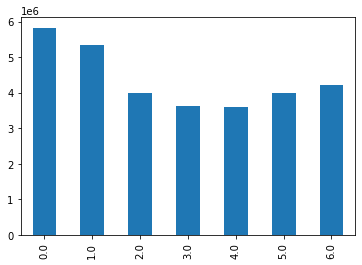

In [42]:
busiest_day=df_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [43]:
busiest_day=busiest_day.figure.savefig(os.path.join(path,'04-Analysis','Visualization','bar_busiest_day_of_week.png'))

 # Q:Are there particular times of the day when people spend the most money?

In [44]:
# total price spend according to hour of the day
busiest_hours_price=df_merge.groupby('order_hour_of_day').agg({'prices':['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
11.0,31249156.9
15.0,30421806.6
10.0,30347489.2
16.0,29573527.6
14.0,29371216.7
12.0,29262832.1
13.0,28708087.0
9.0,27024117.9


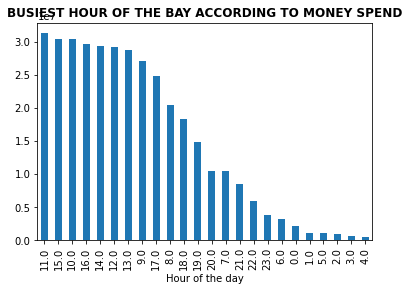

In [10]:
# create a bar plot
bar_busiest_hours_price=busiest_hours_price.plot.bar(legend=None)
plt.title('BUSIEST HOUR OF THE BAY ACCORDING TO MONEY SPEND',fontweight='bold')
plt.xlabel('Hour of the day')
plt.show()

10,11,14 are top three busiest hours of day.

In [45]:
# to export this viz
bar_busiest_hours_price.figure.savefig(os.path.join(path,'04-Analysis','Visualization','bar_busiest_hours_price.png'))

# Q:Are there products purchased by customer grouped with different price range to help marketing and sales?

In [46]:
df_merge_final['prices'].value_counts(dropna=False)

12.3    584654
10.3    482559
4.0     420813
6.3     407141
1.3     399241
         ...  
20.2       116
22.7        90
21.5        80
18.3        10
21.0         8
Name: prices, Length: 243, dtype: int64

In [54]:
# creating deriving coloum with log function
df_merge_final.loc[df_merge_final['prices'] >17, 'price_range_loc'] = 'High_range_product'
df_merge_final.loc[(df_merge_final['prices'] <= 17) & (df_merge_final['prices']>=8) ,'price_range_loc'] = 'Mid_range_product'
df_merge_final.loc[df_merge_final['prices']<8,'price_range_loc'] = 'Low_range_product'

In [55]:
df_merge_final

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_flag,department,income_flag,family_flag,price_range_loc
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,443895.0,2543867.0,5.0,1.0,9.0,30.0,196.0,2.0,0.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,443897.0,1285508.0,7.0,5.0,15.0,11.0,196.0,1.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Regular busy days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,443898.0,2578584.0,8.0,1.0,15.0,10.0,196.0,2.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both,Midwest,Low_activity_customer,Middle-age,beverages,High income,Family,Mid_range_product
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,562335.0,1044841.0,3.0,6.0,11.0,30.0,196.0,1.0,0.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Regular busy days,Most orders,13.0,Regular customer,7.080597,Low Spender,26.0,Non-frequent customer,both,Midwest,Low_activity_customer,Young adult,beverages,Middle income,Single,Mid_range_product
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,562336.0,474720.0,4.0,1.0,20.0,16.0,196.0,6.0,1.0,195.0,Soda,77.0,7.0,9.0,Regularly busy,Busiest_days,Aaverage orders,13.0,Regular customer,7.080597,Low Spender,26.0,Non-frequent customer,both,Midwest,Low_activity_customer,Young adult,beverages,Middle income,Single,Mid_range_product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30564238,98736,Male,Wyoming,23,4/1/2020,1,married,77233,1644592.0,561019.0,4.0,5.0,19.0,0.0,8839.0,13.0,0.0,8839.0,"Kids Natural Calm Multivitamin, Fruity Splash ...",6.0,2.0,12.2,Regularly busy,Regular busy days,Aaverage orders,5.0,New customer,7.653659,Low Spender,30.0,Non-frequent customer,both,Unknown,High_activity_customer,Young adult,other,Middle income,Family,Mid_range_product
30564239,177599,Female,Kansas,71,4/1/2020,3,married,119306,2943378.0,906710.0,2.0,5.0,15.0,5.0,20406.0,15.0,0.0,20407.0,Roasted Unsalted Almonds,6.0,2.0,7.5,Regularly busy,Regular busy days,Most orders,4.0,New customer,8.614286,Low Spender,5.0,Frequent customer,both,Unknown,High_activity_customer,Senior,other,Middle income,Family,Low_range_product
30564240,122741,Male,Michigan,24,4/1/2020,2,married,73357,2042586.0,1029013.0,2.0,3.0,11.0,5.0,29659.0,1.0,1.0,29661.0,Early Result Pregnancy Test,6.0,2.0,9.2,Regularly busy,Slowest_days,Most orders,11.0,Regular customer,9.043137,Low Spender,30.0,Non-frequent customer,both,Unknown,High_activity_customer,Young adult,other,Middle income,Family,Mid_range_product
30564241,122741,Male,Michigan,24,4/1/2020,2,married,73357,2042587.0,456486.0,3.0,1.0,16.0,19.0,29659.0,1.0,1.0,29661.0,Early Result Pregnancy Test,6.0,2.0,9.2,Regularly busy,Busiest_days,Most orders,11.0,Regular customer,9.043137,Low Spender,30.0,Non-frequent customer,both,Unknown,High_activity_customer,Young adult,other,Middle income,Family,Mid_range_product


In [56]:
df_merge_final['price_range_loc'].value_counts()

Low_range_product     16342986
Mid_range_product     13650066
High_range_product      336788
Name: price_range_loc, dtype: int64

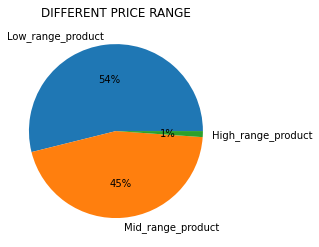

In [57]:
range_product=df_merge_final['price_range_loc'].value_counts().plot.pie(title='DIFFERENT PRICE RANGE',label='',autopct=('%1.f%%'))

In [58]:
range_product.figure.savefig(os.path.join(path,'04-Analysis','Visualization','pie_price_range.png'))

# Q:Are there certain types of products that are more popular than others? Which departments have the highest frequency of product orders?¶

In [59]:
df_merge_final['department'].value_counts(dropna=False)

produce            8894907
dairy eggs         5066698
snacks             2706641
beverages          2520632
frozen             2076535
pantry             1747119
bakery             1097168
canned goods        994292
deli                981150
dry goods pasta     805645
household           686604
meat seafood        661560
breakfast           657233
personal care       416314
babies              401315
international       250293
NaN                 234403
alcohol             141025
pets                 91093
missing              66879
other                33925
bulk                 32812
Name: department, dtype: int64

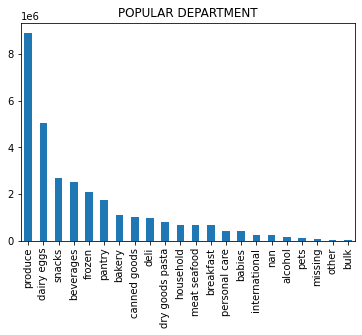

In [60]:
popular_products=df_merge_final['department'].value_counts(dropna=False).plot.bar()
plt.title('POPULAR DEPARTMENT')
plt.show()

In [61]:
# export the plot
popular_products.figure.savefig(os.path.join(path,'04-Analysis','Visualization','popular_products.png'))

# Q:What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [62]:
df_merge_final['loyalty_flag'].value_counts(dropna=False)

Regular customer    15518648
Loyal customer      10481344
New customer         4564251
Name: loyalty_flag, dtype: int64

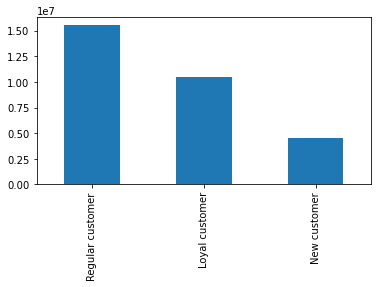

In [63]:
loyal_customer=df_merge_final['loyalty_flag'].value_counts().plot.bar()
plt.subplots_adjust(bottom=0.3) 

In [64]:
# export the plot
loyal_customer.figure.savefig(os.path.join(path,'04-Analysis','Visualization','loyal_customer.png'))

# Q:Are there differences in ordering habits based on a customer’s loyalty status?

In [81]:
# creating a crosstab between loyalty_flag and department-normalized
ordering_habit=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['loyalty_flag'],normalize='index')

In [86]:
# creating a crosstab between loyalty_flag and department
ordering_habit_2=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['loyalty_flag'])

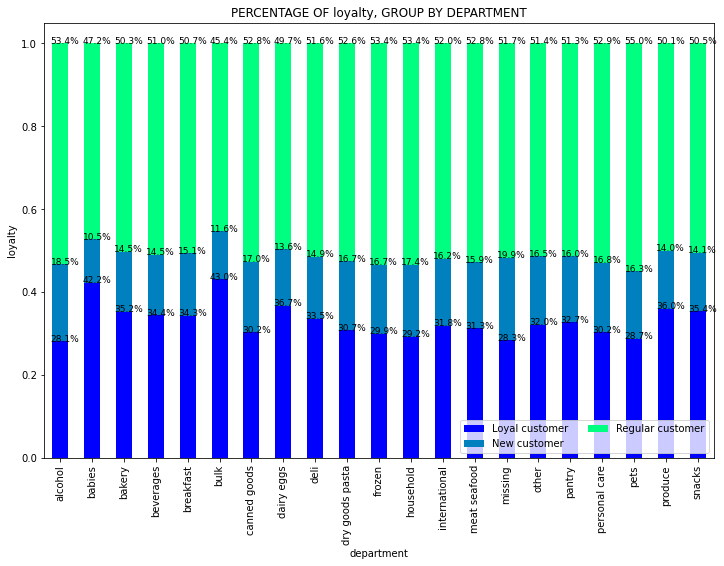

In [87]:
# normalize bar chart of loyalty, group by department
stacked_loyalty_department = ordering_habit.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 8))
plt.title('PERCENTAGE OF loyalty, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('loyalty')

for n, x in enumerate([*ordering_habit_2.index.values]):
    for proportion, y_loc in zip(ordering_habit.loc[x], ordering_habit.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [88]:
# export the plot
stacked_loyalty_department.figure.savefig(os.path.join(path,'04-Analysis','Visualization','loyalty_department.png'))

# Q:Are there differences in ordering habits based on a customer’s region?¶

In [93]:
# creating a crosstab between loyalty_flag and region-normalized
ordering_habit_region=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['region'],normalize='index')

In [94]:
# creating a crosstab between loyalty_flag and department
ordering_habit_region2=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['loyalty_flag'])

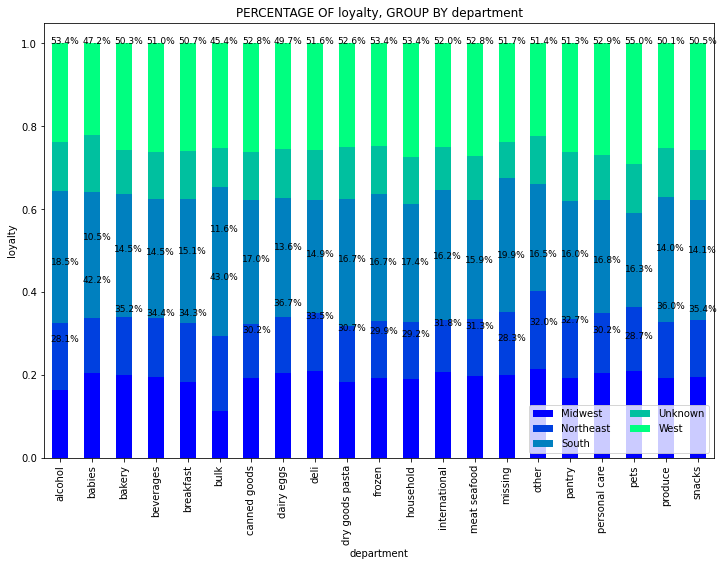

In [95]:
# normalize bar chart of loyalty, group by region
stacked_loyalty_department = ordering_habit_region.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 8))
plt.title('PERCENTAGE OF loyalty, GROUP BY department')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('loyalty')

for n, x in enumerate([*ordering_habit_2.index.values]):
    for proportion, y_loc in zip(ordering_habit.loc[x], ordering_habit.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [97]:
# export chart
stacked_loyalty_department.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_department.png'))

# Q:Classification based on certain type of goods

In [102]:
df_merge_final['Profile'].value_counts(dropna=False)

NaN                             29410275
Customers with other product     1153968
Name: Profile, dtype: int64

In [106]:
df_merge_final.loc[df_merge_final['department_id']==18,'Profile']='Customers with babies'
df_merge_final.loc[df_merge_final['department_id']==8,'Profile']='Customers with pets'
df_merge_final.loc[df_merge_final['department_id']==12,'Profile']='Customers who eat meat'
df_merge_final.loc[~df_merge_final['department_id'].isin([8,12,18]),'Profile']='Customers with other product'

In [107]:
df_merge_final['Profile'].value_counts(dropna=False)

Customers with other product    29410275
Customers who eat meat            661560
Customers with babies             401315
Customers with pets                91093
Name: Profile, dtype: int64

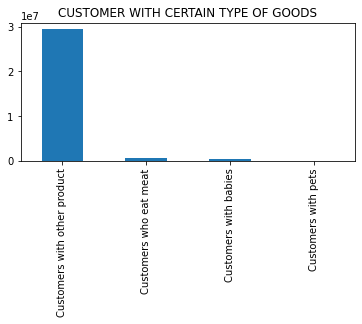

In [108]:
profile=df_merge_final['Profile'].value_counts(dropna=False).plot.bar(title='CUSTOMER WITH CERTAIN TYPE OF GOODS')
plt.subplots_adjust(bottom=0.4) #adjust margins

In [109]:
# export the plot
profile.figure.savefig(os.path.join(path,'04-Analysis','Visualization','profile.png'))